# 安装环境

In [3]:
import os
os.chdir('./mmsegmentation')

In [4]:
# 检查 mmseg
import mmseg
print('mmseg版本', mmseg.__version__)

mmseg版本 1.0.0


In [5]:
# 配置中文环境
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /root/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

--2023-06-14 12:45:46--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/root/miniconda3/li 100%[===================>]   9.58M  18.8MB/s    in 0.5s    

2023-06-14 12:45:47 (18.8 MB/s) - ‘/root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



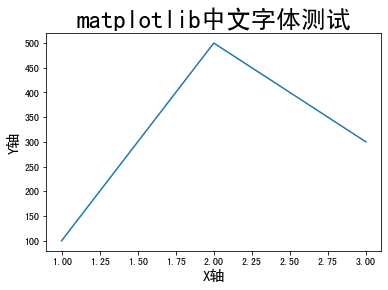

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 准备数据集

In [ ]:
# 进入终端界面
# cd /root/autodl-tmp/MMSeg/
# 删除冗余文件
# find . -iname '__MACOSX'
# find . -iname '.DS_Store'
# find . -iname '.ipynb_checkpoints'
# 只发现了'.ipynb_checkpoints'
# for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

# 修改配置文件

# 训练

In [ ]:
# !python tools/train.py data/segformer_mit-b2_melon.py

# 可视化训练日志

In [30]:
# 日志文件路径
log_path = 'work_dirs/segformer_mit-b2_melon/20230614_235603/vis_data/scalars.json'

In [31]:
# 载入训练日志
with open(log_path, "r") as f:
    json_list = f.readlines()

In [32]:
len(json_list)

37

In [33]:
eval(json_list[4])

{'aAcc': 81.64,
 'mIoU': 40.58,
 'mAcc': 52.61,
 'data_time': 0.003614354133605957,
 'time': 0.1980440139770508,
 'step': 400}

In [34]:
import pandas as pd

In [35]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        # df_test = df_test.append(eval(each), ignore_index=True)
        df_test = pd.concat([df_test,pd.DataFrame([eval(each)])],ignore_index=True)
    else:
        # df_train = df_train.append(eval(each), ignore_index=True)
        df_train = pd.concat([df_train,pd.DataFrame([eval(each)])],ignore_index=True)

In [36]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,time,memory,step
0,0.004989,0.013501,0.721689,0.721689,70.368767,0.136041,3739,100
1,0.004978,0.011048,0.531266,0.531266,85.413742,0.134153,2105,200
2,0.004967,0.010013,0.534583,0.534583,83.744812,0.130965,2105,300
3,0.004956,0.013179,0.450702,0.450702,87.331963,0.135072,2105,400
4,0.004945,0.013228,0.552977,0.552977,77.137184,0.134871,13631,500
5,0.004934,0.014015,0.467394,0.467394,86.123848,0.136770,2108,600
6,0.004923,0.016060,0.484438,0.484438,77.487755,0.137517,2108,700
7,0.004912,0.012232,0.398774,0.398774,92.468643,0.133125,2108,800
8,0.004901,0.009744,0.422150,0.422150,86.938095,0.129517,2878,900
9,0.004890,0.018306,0.436791,0.436791,84.499931,0.142628,2108,1000


In [37]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

In [38]:
# 可视化辅助函数
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

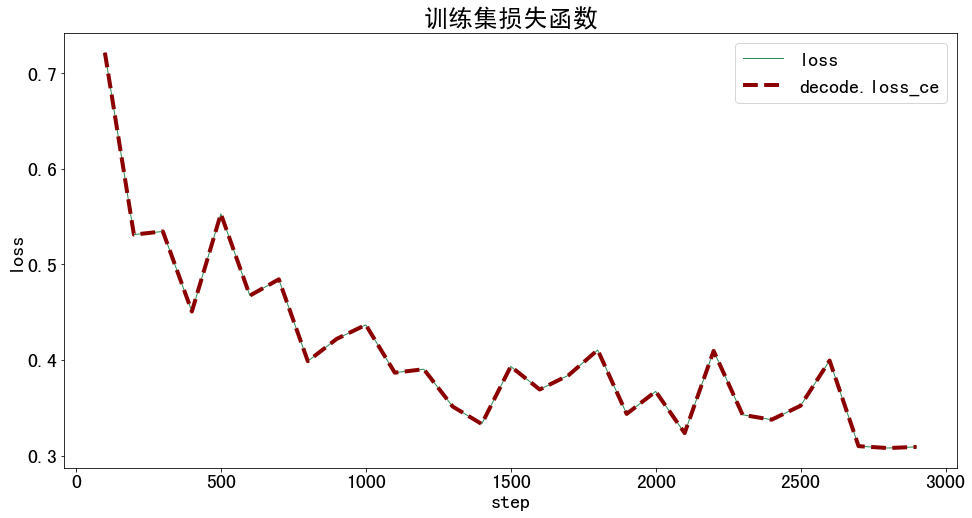

In [39]:
# 可视化训练集损失函数损失函数
metrics = ['loss', 'decode.loss_ce']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [40]:
# 可视化训练集准确率
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg', 'time',
       'memory', 'step'],
      dtype='object')

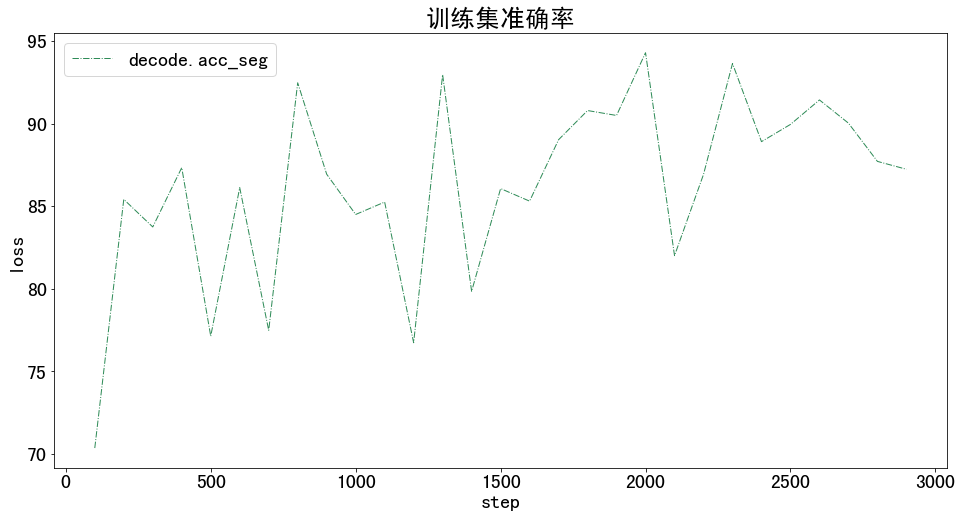

In [41]:
metrics = ['decode.acc_seg']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [42]:
# 可视化测试集评估指标

In [43]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [44]:
metrics = ['aAcc', 'mIoU', 'mAcc']

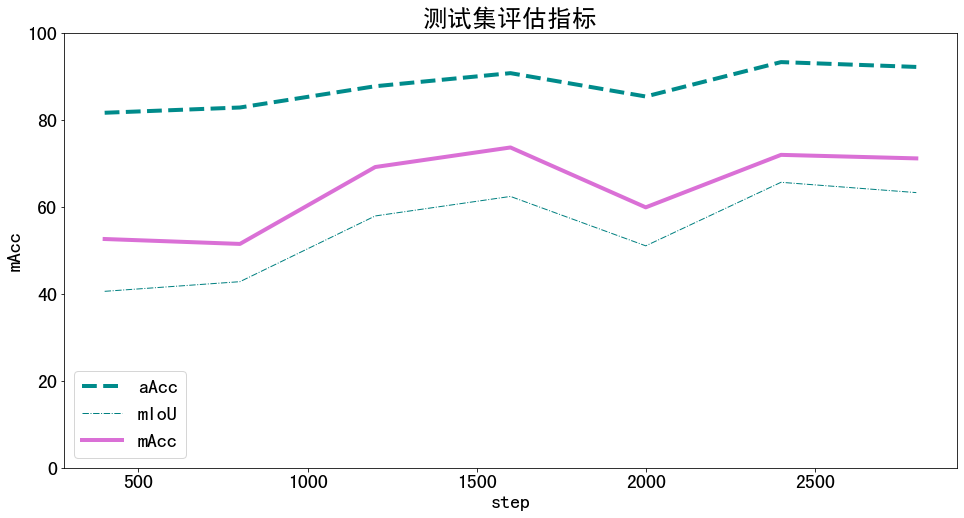

In [45]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [47]:
!python tools/test.py data/segformer_mit-b2_melon.py work_dirs/segformer_mit-b2_melon/best_aAcc_iter_2400.pth

06/15 10:10:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 28322200
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode

# 测试自己图片

In [49]:
!python demo/image_demo.py \
        data/melon.jpg \
        data/segformer_mit-b2_melon.py \
        work_dirs/segformer_mit-b2_melon/best_aAcc_iter_2400.pth \
        --out-file outputs/segformer_img.jpg \
        --device cuda:0 \
        --opacity 0.5

/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: work_dirs/segformer_mit-b2_melon/best_aAcc_iter_2400.pth
06/15 10:11:16 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


# 测试自己视频

In [50]:
# 导入工具包
import numpy as np
import time
import shutil

import torch

from PIL import Image
import cv2

import mmcv
import mmengine
from mmseg.apis import inference_model
from mmseg.utils import register_all_modules
register_all_modules()

from mmseg.datasets import WaterMelonDataset

In [51]:
# 载入模型
# 模型 config 配置文件
config_file = 'data/segformer_mit-b2_melon.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'work_dirs/segformer_mit-b2_melon/best_aAcc_iter_2400.pth'

In [52]:
from mmseg.apis import init_model
model = init_model(config_file, checkpoint_file, device='cuda:0')

from mmengine.model.utils import revert_sync_batchnorm
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: work_dirs/segformer_mit-b2_melon/best_aAcc_iter_2400.pth


In [53]:
# input_video = 'data/traffic.mp4'

input_video = 'data/melon.mp4'

In [54]:
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('创建临时文件夹 {} 用于存放每帧预测结果'.format(temp_out_dir))

创建临时文件夹 20230615101348 用于存放每帧预测结果


In [55]:
# 单帧预测
# 获取数据集类别名和调色板
from mmseg.datasets import watermelon
classes = watermelon.WaterMelonDataset.METAINFO['classes']
palette = watermelon.WaterMelonDataset.METAINFO['palette']

In [56]:
def pridict_single_frame(img, opacity=0.2):
    
    result = inference_model(model, img)
    
    # 将分割图按调色板染色
    seg_map = np.array(result.pred_sem_seg.data[0].detach().cpu().numpy()).astype('uint8')
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    
    show_img = (np.array(seg_img.convert('RGB')))*(1-opacity) + img*opacity
    
    return show_img

In [57]:
# 逐帧预测
# 读入待预测视频
imgs = mmcv.VideoReader(input_video)

prog_bar = mmengine.ProgressBar(len(imgs))

# 对视频逐帧处理
for frame_id, img in enumerate(imgs):
    
    ## 处理单帧画面
    show_img = pridict_single_frame(img, opacity=0.15)
    temp_path = f'{temp_out_dir}/{frame_id:06d}.jpg' # 保存语义分割预测结果图像至临时文件夹
    cv2.imwrite(temp_path, show_img)

    prog_bar.update() # 更新进度条

# 把每一帧串成视频文件
mmcv.frames2video(temp_out_dir, 'outputs/segformer_video.mp4', fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir) # 删除存放每帧画面的临时文件夹
print('删除临时文件夹', temp_out_dir)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 142/142, 73.2 task/s, elapsed: 2s, ETA:     0s[                                                  ] 0/142, elapsed: 0s, ETA:
删除临时文件夹 20230615101348
